In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
X = np.loadtxt(open("/Users/fairuzishraque/Documents/Colgate/Fall 2021/MATH 482/DMD_tracer_advection/tracer-advection model/test_source_1.csv", "rb"), delimiter=",")

In [45]:
np.shape(X)

(120, 2000)

In [46]:
def DMD(data, r):
    """Dynamic Mode Decomposition (DMD) algorithm."""
    
    ## Build data matrices
    X1 = data[:, : -1]
    X2 = data[:, 1 :]
    ## Perform singular value decomposition on X1
    u, s, v = np.linalg.svd(X1, full_matrices = False)
    ## Compute the Koopman matrix
    A_tilde = u[:, : r].conj().T @ X2 @ v[: r, :].conj().T * np.reciprocal(s[: r])
    ## Perform eigenvalue decomposition on A_tilde
    Phi, Q = np.linalg.eig(A_tilde)
    ## Compute the coefficient matrix
    Psi = X2 @ v[: r, :].conj().T @ np.diag(np.reciprocal(s[: r])) @ Q
    A = Psi @ np.diag(Phi) @ np.linalg.pinv(Psi)
    
    return A_tilde, Phi, A

In [47]:
def DMD4cast(data, r, pred_step):
    N, T = data.shape
    _, _, A = DMD(data, r)
    mat = np.append(data, np.zeros((N, pred_step)), axis = 1)
    for s in range(pred_step):
        mat[:, T + s] = (A @ mat[:, T + s - 1]).real
    return mat[:, - pred_step :]

In [227]:
X_sel = np.concatenate((X[0:120,0:300], X[0:120,0:300]**2))
X_pred = DMD4cast(X_sel, 40, 50)
np.shape(X_pred)

(240, 50)

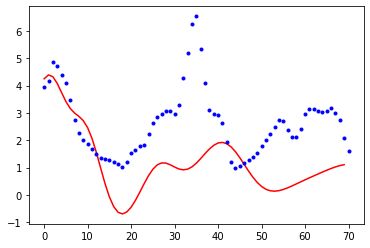

In [196]:
plt.plot(X_pred[41+20], 'r-')
plt.plot(X[41+20, 300:371], 'b.')

In [189]:
_, _, A = DMD(X_sel, 35)

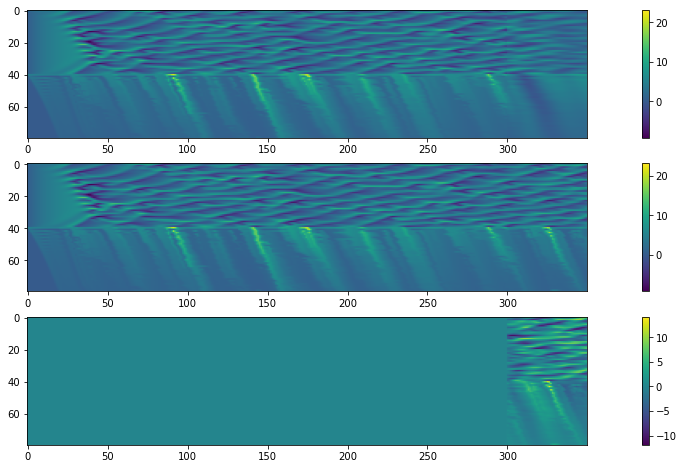

In [230]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 8), nrows=3)
X_mat= np.concatenate((X_sel[0:80,:], X_pred[0:80,:]), axis=1)
pos = ax1.imshow(X_mat)
fig.colorbar(pos, ax=ax1)
pos1 = ax2.imshow(X[0:80,0:350])
fig.colorbar(pos1, ax=ax2)
pos2 = ax3.imshow(X[0:80,0:350]-X_mat)
fig.colorbar(pos2, ax=ax3)


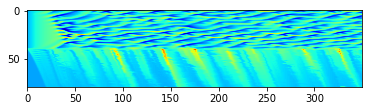

<function matplotlib.pyplot.show(close=None, block=None)>

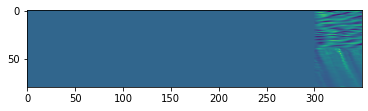

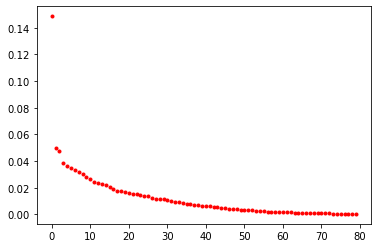

In [244]:
#### Training with the first 300 timesteps ####
X_sel300 = (X[0:80,0:300])

# Finding the major dynamic modes
u, s, v = np.linalg.svd(X_sel300)
plt.plot(s/sum(s), 'r.')

# seems likwe 50 will do the job

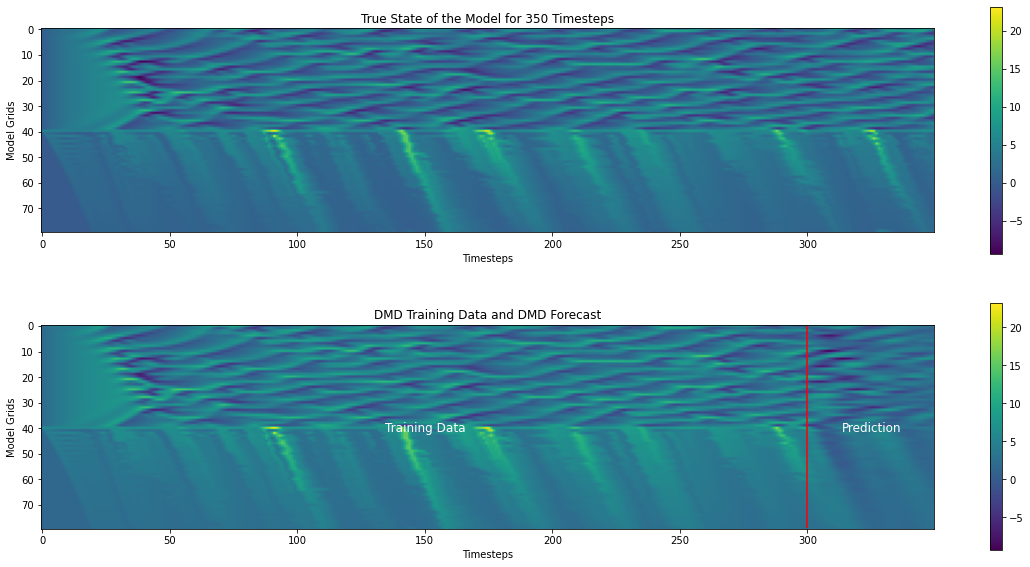

In [358]:
X_pred300 = DMD4cast(X_sel300, 40, 50)
X_mat300= np.concatenate((X_sel300[0:80,:], X_pred300[0:80,:]), axis=1)

fig, (ax1, ax2) = plt.subplots(figsize=(20,10), nrows=2)
pos_true = ax1.imshow(X[0:80,0:350])
ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Model Grids")
ax1.set_title("True State of the Model for 350 Timesteps")
fig.colorbar(pos1, ax=ax1)


pos_pred = ax2.imshow(X_mat300)
ax2.vlines(x=300, ymin=0, ymax=79, colors='r')
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Model Grids")
ax2.text(150, 40, 'Training Data', horizontalalignment='center',
verticalalignment='center', color='white', fontsize='large', fontweight = 300)
ax2.text(325, 40, 'Prediction', horizontalalignment='center',
verticalalignment='center', color='white', fontsize='large', fontweight = 300)
ax2.set_title("DMD Training Data and DMD Forecast")
fig.colorbar(pos, ax=ax2)

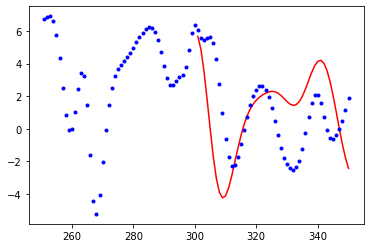

In [354]:
row = 14
plt.plot(range(301,351), X_pred300[row], 'r-')
plt.plot(range(251,351), X[row, 251:351], 'b.')

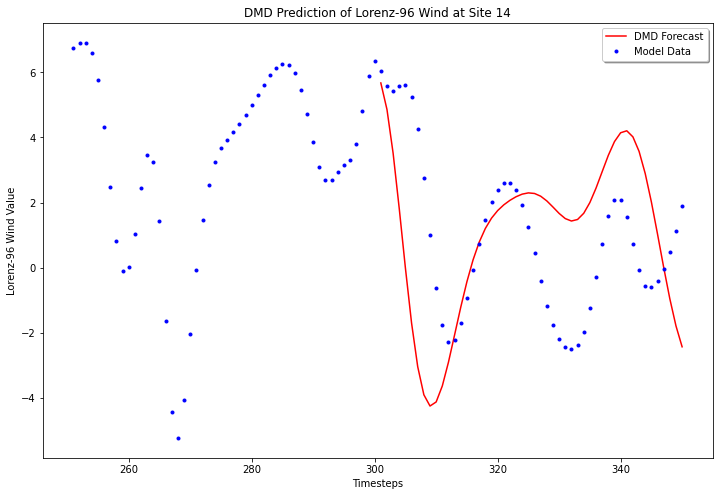

In [356]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(301,351), X_pred300[14], 'r-', label = "DMD Forecast")
ax.plot(range(251,351), X[14, 251:351], 'b.', label = "Model Data")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Lorenz-96 Wind Value")
ax.set_title("DMD Prediction of Lorenz-96 Wind at Site 14")
legend = ax.legend(loc='upper right', shadow=True)
plt.show()


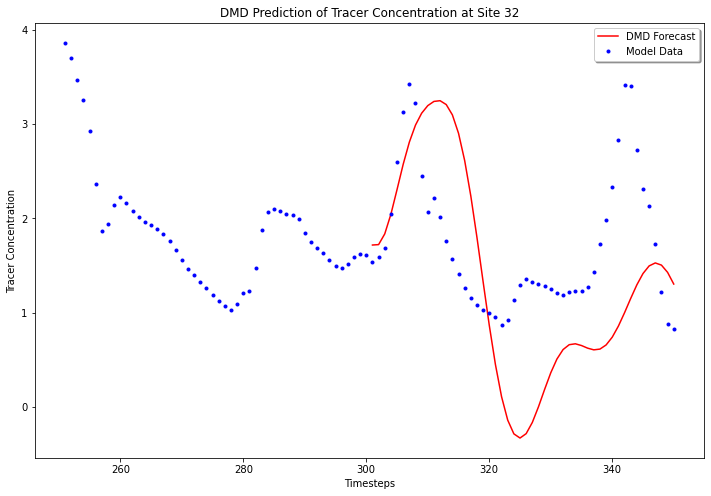

In [343]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(301,351), X_pred300[72], 'r-', label = "DMD Forecast")
ax.plot(range(251,351), X[72, 251:351], 'b.', label = "Model Data")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Tracer Concentration")
ax.set_title("DMD Prediction of Tracer Concentration at Site 32")
legend = ax.legend(loc='upper right', shadow=True)
plt.show()

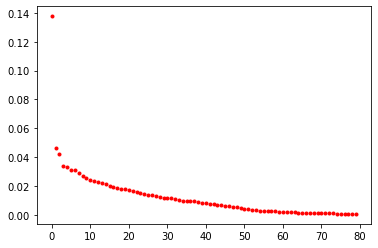

In [357]:
#### Training with the first 500 timesteps ####
X_sel500 = (X[0:80,0:500])

# Finding the major dynamic modes
u, s, v = np.linalg.svd(X_sel500)
plt.plot(s/sum(s), 'r.')

# seems likwe 50 will do the job

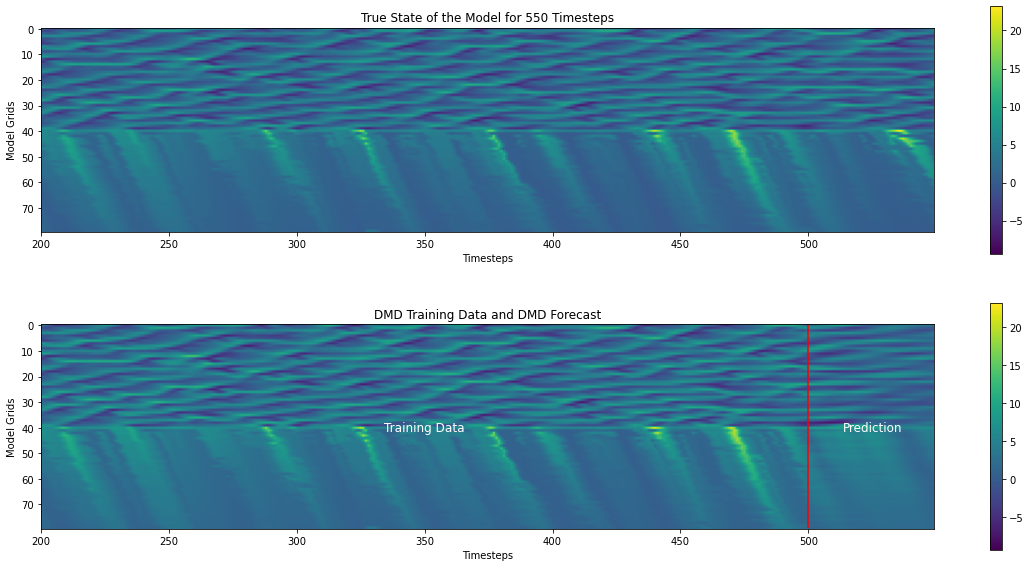

In [375]:
X_pred500 = DMD4cast(X_sel500, 40, 50)
X_mat500= np.concatenate((X_sel500[0:80,:], X_pred500[0:80,:]), axis=1)

fig, (ax1, ax2) = plt.subplots(figsize=(20,10), nrows=2)
pos_true = ax1.imshow(X[0:80,0:550])
ax1.set_xlim([200,549])
ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Model Grids")
ax1.set_title("True State of the Model for 550 Timesteps")
fig.colorbar(pos1, ax=ax1)


pos_pred = ax2.imshow(X_mat500)
ax2.vlines(x=500, ymin=0, ymax=79, colors='r')
ax2.set_xlim([200,549])
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Model Grids")
ax2.text(350, 40, 'Training Data', horizontalalignment='center',
verticalalignment='center', color='white', fontsize='large', fontweight = 300)
ax2.text(525, 40, 'Prediction', horizontalalignment='center',
verticalalignment='center', color='white', fontsize='large', fontweight = 300)
ax2.set_title("DMD Training Data and DMD Forecast")
fig.colorbar(pos, ax=ax2)

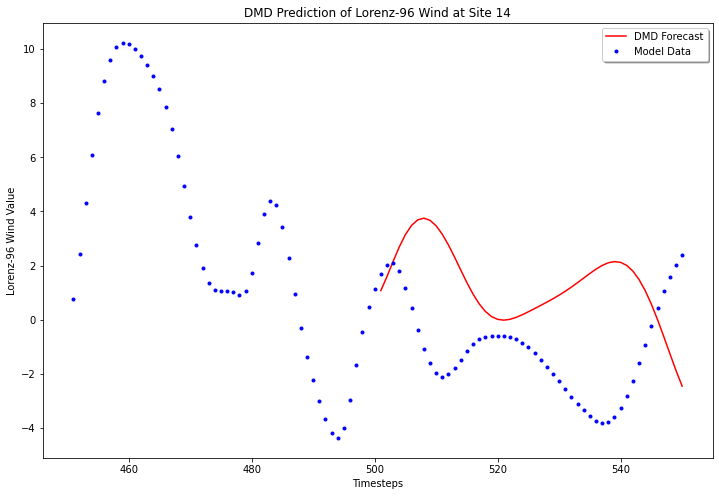

In [370]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(501,551), X_pred500[14], 'r-', label = "DMD Forecast")
ax.plot(range(451,551), X[14, 451:551], 'b.', label = "Model Data")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Lorenz-96 Wind Value")
ax.set_title("DMD Prediction of Lorenz-96 Wind at Site 14")
legend = ax.legend(loc='upper right', shadow=True)
plt.show()

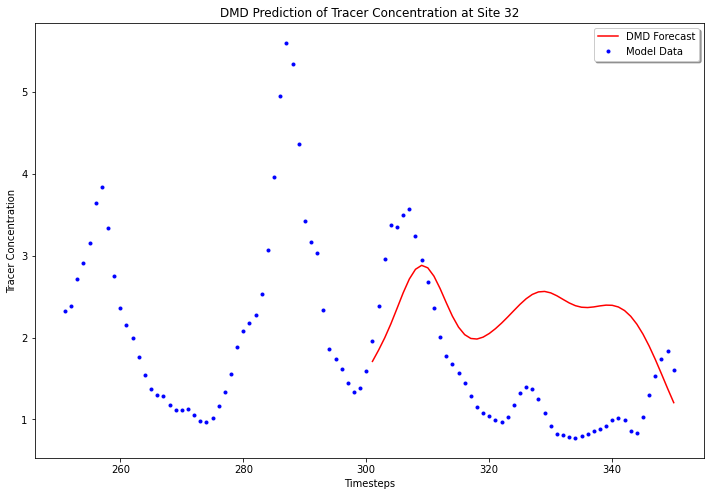

In [377]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(501,551), X_pred500[72], 'r-', label = "DMD Forecast")
ax.plot(range(451,551), X[72, 451:551], 'b.', label = "Model Data")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Tracer Concentration")
ax.set_title("DMD Prediction of Tracer Concentration at Site 32")
legend = ax.legend(loc='upper right', shadow=True)
plt.show()

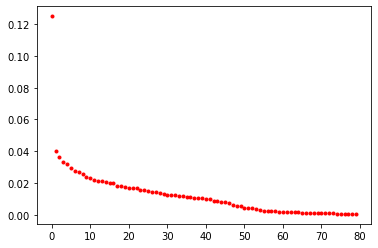

In [371]:
#### Training with the first 1000 timesteps ####
X_sel1000 = (X[0:80,0:1000])

# Finding the major dynamic modes
u, s, v = np.linalg.svd(X_sel1000)
plt.plot(s/sum(s), 'r.')

# seems likwe 50 will do the job

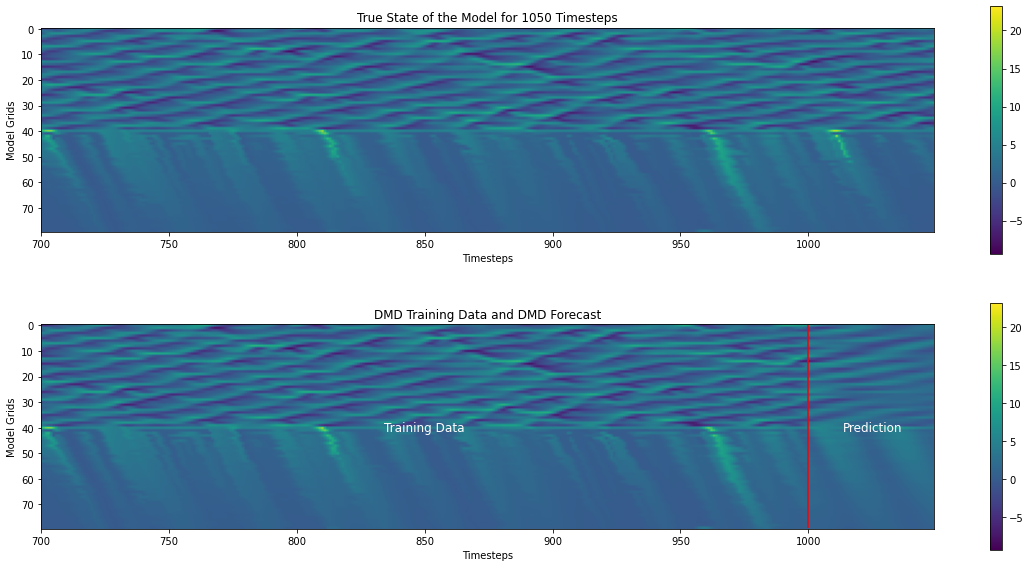

In [376]:
X_pred1000 = DMD4cast(X_sel1000, 40, 50)
X_mat1000= np.concatenate((X_sel1000[0:80,:], X_pred1000[0:80,:]), axis=1)

fig, (ax1, ax2) = plt.subplots(figsize=(20,10), nrows=2)
pos_true = ax1.imshow(X[0:80,0:1050])
ax1.set_xlim([700,1049])
ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Model Grids")
ax1.set_title("True State of the Model for 1050 Timesteps")
fig.colorbar(pos1, ax=ax1)


pos_pred = ax2.imshow(X_mat1000)
ax2.vlines(x=1000, ymin=0, ymax=79, colors='r')
ax2.set_xlim([700,1049])
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Model Grids")
ax2.text(850, 40, 'Training Data', horizontalalignment='center',
verticalalignment='center', color='white', fontsize='large', fontweight = 300)
ax2.text(1025, 40, 'Prediction', horizontalalignment='center',
verticalalignment='center', color='white', fontsize='large', fontweight = 300)
ax2.set_title("DMD Training Data and DMD Forecast")
fig.colorbar(pos, ax=ax2)

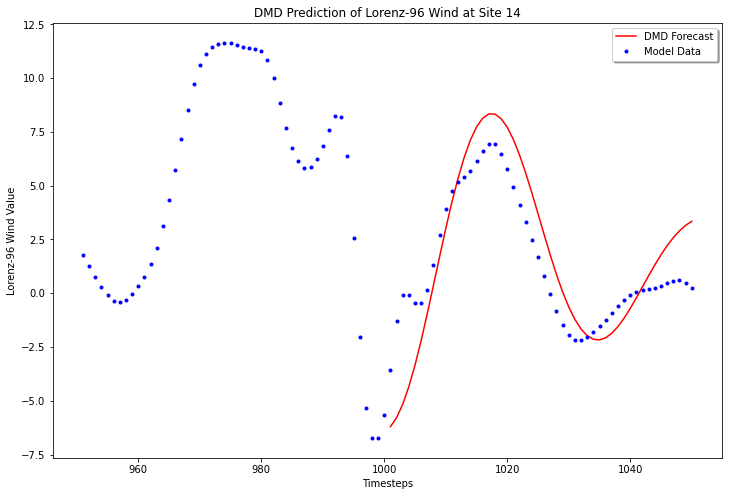

In [378]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(1001,1051), X_pred1000[14], 'r-', label = "DMD Forecast")
ax.plot(range(951,1051), X[14, 951:1051], 'b.', label = "Model Data")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Lorenz-96 Wind Value")
ax.set_title("DMD Prediction of Lorenz-96 Wind at Site 14")
legend = ax.legend(loc='upper right', shadow=True)
plt.show()

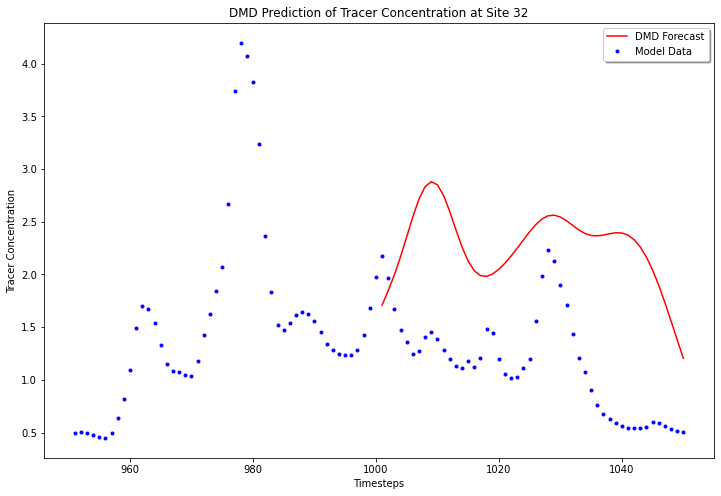

In [379]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(1001,1051), X_pred500[72], 'r-', label = "DMD Forecast")
ax.plot(range(951,1051), X[72, 951:1051], 'b.', label = "Model Data")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Tracer Concentration")
ax.set_title("DMD Prediction of Tracer Concentration at Site 32")
legend = ax.legend(loc='upper right', shadow=True)
plt.show()